# *Fruit Vegetables: Retail Prices of Agricultural Commodities by Geolocation, Commodity, Year and Period*
This data is a real data from Philippine Statistics Authority Openstat website: https://openstat.psa.gov.ph/.

In this notebook we will perform a Time series Analysis on the Fruit Vegetables: Retail Prices of Agricultural Commodities by Geolocation, Commodity, Year and Period. This data is limited to Ncr only, and a 2012-2021 based data.


In [ ]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose as sm

In [ ]:
## import file

data_retail= pd.read_excel("/content/sample_data/fruit_vege(2012-21).xlsx", index_col="Date")

data_retail.head()

,ampalaya_1kg,sayote_1kg,upo_1kg,pipino_1kg,talong_1kg,patola_1kg,squash_1kg,tomato_1kg
Date,,,,,,,,
2012-01-01,38.14,13.64,30.97,60.26,45.61,35.46,29.72,39.77
2012-02-01,36.86,13.92,30.03,58.44,36.50,35.33,28.15,23.94
2012-03-01,38.11,13.37,29.40,57.21,30.33,35.38,27.50,34.52
2012-04-01,37.04,11.70,28.90,56.24,29.57,34.76,27.31,54.55
2012-05-01,32.57,11.64,28.53,55.52,24.22,34.19,27.42,56.62


### *Looking at the shape of our Dataset. It contains 8 columns and 120 rows.*

In [ ]:
data_retail.shape

(120, 8)

Text(0, 0.5, 'Retail Price')

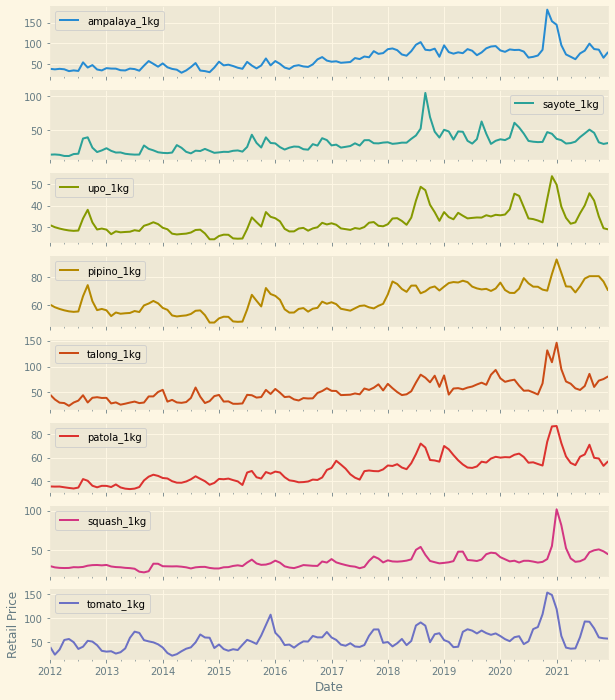

In [ ]:
##plotting the dataset

plt.style.use("Solarize_Light2")  ##theme

data_retail.plot(subplots= True, figsize= (10,12))
plt.ylabel("Retail Price")

#plt.savefig("figure_1.png")

*As we can observe from above the retail price of each fruits and vegetables shows a relative increased at the beginning of every year. This will need further investigation.*

In [ ]:
## I will make a dataframe that will save each avarage retail price per year.

avg_retail = pd.DataFrame()
avg_retail["2012"] = data_retail["2012"].mean()
avg_retail["2013"] = data_retail["2013"].mean()
avg_retail["2014"] = data_retail["2014"].mean()
avg_retail["2015"] = data_retail["2015"].mean()
avg_retail["2016"] = data_retail["2016"].mean()
avg_retail["2017"] = data_retail["2017"].mean()
avg_retail["2018"] = data_retail["2018"].mean()
avg_retail["2019"] = data_retail["2019"].mean()
avg_retail["2020"] = data_retail["2020"].mean()
avg_retail["2021"] = data_retail["2021"].mean()


avg_retail

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing a DataFrame with a datetimelike 

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
ampalaya_1kg,38.584167,40.999167,38.529167,47.490833,49.919167,63.661667,83.379167,82.666667,93.010000,84.393333
sayote_1kg,19.312500,18.253333,19.151667,25.252500,26.905000,29.255000,45.505000,41.734167,41.005833,36.553333
upo_1kg,30.615000,29.170000,27.313333,29.313333,30.229167,30.423333,37.224167,35.098333,39.089167,37.144167
pipino_1kg,59.579167,56.765833,53.149167,57.042500,58.795833,58.799167,71.759167,73.612500,73.235000,77.535833
talong_1kg,35.532500,34.388333,38.497500,39.079167,44.745833,52.322500,63.695833,66.558333,72.441667,77.579167
patola_1kg,36.015000,37.699167,40.400000,43.207500,42.696667,48.976667,57.779167,58.219167,62.229167,62.753333
squash_1kg,29.051667,27.645000,28.490000,31.305000,31.341667,33.635833,39.313333,40.610000,38.152500,52.220833
tomato_1kg,42.955000,46.240000,40.999167,52.947500,55.000833,53.317500,61.466667,62.687500,80.058333,66.250833


Text(0.5, 1.0, 'Annual Retail prices')

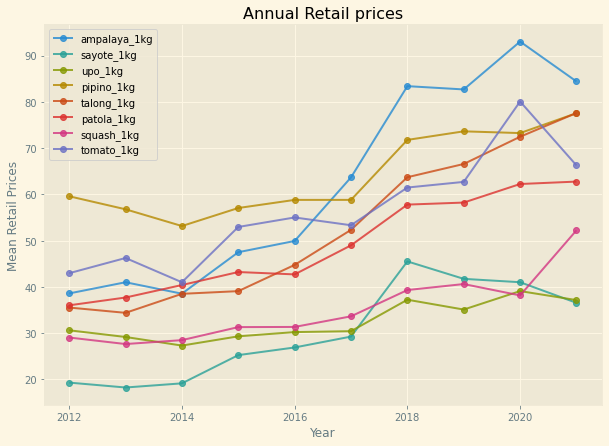

In [ ]:
avgs= avg_retail.transpose()  ##transposing the x and y columns

#plotting the means of each fruit and vegetables
plt.style.use("Solarize_Light2")  ##theme

avgs.plot(figsize= (10,7), marker= "o", alpha= 0.8)
plt.xlabel("Year")
plt.ylabel("Mean Retail Prices")
plt.title("Annual Retail prices")

#plt.savefig("Figure_2_means.png")

*Based on the Graph of the Annual retail prices over the years. We can observe increasing average of the Annual retail prices of fruits and vegetables.*

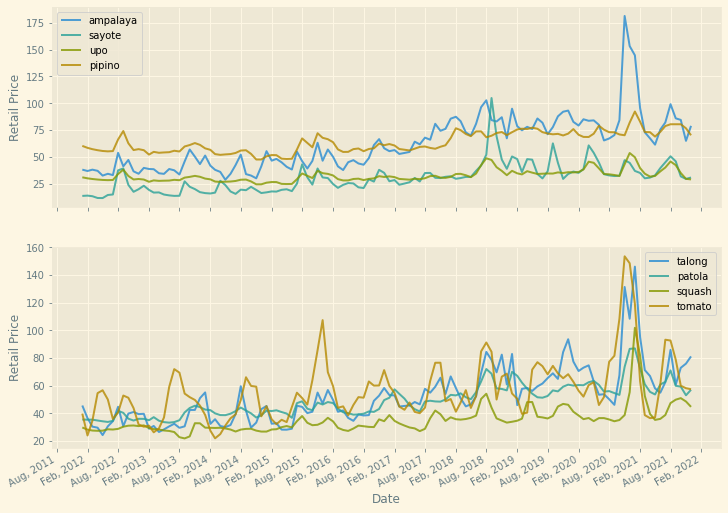

In [ ]:
##to plot it altogether by month
plt.style.use("Solarize_Light2")  ##theme

import matplotlib.dates as mdates

fig, ax = plt.subplots(2, sharex= True, figsize=(12,9))

month_locator = mdates.MonthLocator(interval=6)  #interval specifies the number of months of separation between each tick mark
year_month_formatter = mdates.DateFormatter("%b, %Y") # to format date (i.e Jan, 2012)


ax[0].plot(data_retail.index,data_retail["ampalaya_1kg"], alpha= 0.8)
ax[0].plot(data_retail.index,data_retail["sayote_1kg"], alpha= 0.8)
ax[0].plot(data_retail.index,data_retail["upo_1kg"], alpha= 0.8)
ax[0].plot(data_retail.index,data_retail["pipino_1kg"], alpha= 0.8)
ax[1].plot(data_retail.index,data_retail["talong_1kg"], alpha= 0.8)
ax[1].plot(data_retail.index,data_retail["patola_1kg"], alpha= 0.8)
ax[1].plot(data_retail.index,data_retail["squash_1kg"], alpha= 0.8)
ax[1].plot(data_retail.index, data_retail["tomato_1kg"], alpha= 0.8)

ax[1].set_xlabel("Date")
ax[0].set_ylabel("Retail Price")
ax[1].set_ylabel("Retail Price")
ax[0].legend(["ampalaya", "sayote","upo","pipino"])
ax[1].legend(["talong","patola","squash","tomato"])

ax[1].xaxis.set_major_locator(month_locator) # Locator for major axis only.
ax[1].xaxis.set_major_formatter(year_month_formatter)  # formatter for major axis only


fig.autofmt_xdate()
plt.savefig("figure_2.png")

In [ ]:
data_new= data_retail.shift(1)
data_new= data_new.rename({"ampalaya_1kg": "ampalaya","sayote_1kg": "sayote","upo_1kg": "upo",
                           "pipino_1kg":"pipino","talong_1kg": "talong","patola_1kg": "patola",
                           "squash_1kg":"squash","tomato_1kg": "tomato"}, axis=1)
data_new

,ampalaya,sayote,upo,pipino,talong,patola,squash,tomato
Date,,,,,,,,
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-01,38.14,13.64,30.97,60.26,45.61,35.46,29.72,39.77
2012-03-01,36.86,13.92,30.03,58.44,36.50,35.33,28.15,23.94
2012-04-01,38.11,13.37,29.40,57.21,30.33,35.38,27.50,34.52
2012-05-01,37.04,11.70,28.90,56.24,29.57,34.76,27.31,54.55
...,...,...,...,...,...,...,...,...
2021-08-01,82.06,44.97,40.11,78.74,62.44,62.73,38.72,93.19
2021-09-01,99.16,50.58,45.73,80.43,85.89,70.98,47.36,92.60
2021-10-01,85.94,45.88,42.34,80.43,60.67,59.86,49.83,78.79


In [ ]:
## we calculate the percentage increase each month on every fruit and vegetable.


## I prefer to do it this way. 

#ampalaya
prcnt1 = pd.DataFrame(data_retail.copy())

prcnt= pd.concat([prcnt1,data_new], axis=1)

prcnt

,ampalaya_1kg,sayote_1kg,upo_1kg,pipino_1kg,talong_1kg,patola_1kg,squash_1kg,tomato_1kg,ampalaya,sayote,upo,pipino,talong,patola,squash,tomato
Date,,,,,,,,,,,,,,,,
2012-01-01,38.14,13.64,30.97,60.26,45.61,35.46,29.72,39.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-01,36.86,13.92,30.03,58.44,36.50,35.33,28.15,23.94,38.14,13.64,30.97,60.26,45.61,35.46,29.72,39.77
2012-03-01,38.11,13.37,29.40,57.21,30.33,35.38,27.50,34.52,36.86,13.92,30.03,58.44,36.50,35.33,28.15,23.94
2012-04-01,37.04,11.70,28.90,56.24,29.57,34.76,27.31,54.55,38.11,13.37,29.40,57.21,30.33,35.38,27.50,34.52
2012-05-01,32.57,11.64,28.53,55.52,24.22,34.19,27.42,56.62,37.04,11.70,28.90,56.24,29.57,34.76,27.31,54.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,99.16,50.58,45.73,80.43,85.89,70.98,47.36,92.60,82.06,44.97,40.11,78.74,62.44,62.73,38.72,93.19
2021-09-01,85.94,45.88,42.34,80.43,60.67,59.86,49.83,78.79,99.16,50.58,45.73,80.43,85.89,70.98,47.36,92.60
2021-10-01,84.47,31.84,35.00,80.43,72.88,59.26,50.94,59.92,85.94,45.88,42.34,80.43,60.67,59.86,49.83,78.79


In [ ]:
#ampalaya
prcnt["diff_ampalaya"]= prcnt.ampalaya_1kg.diff()
prcnt["div_ampalaya"]= (prcnt["diff_ampalaya"]) / (prcnt["ampalaya"])
prcnt["percentage_ampalaya"] = prcnt["div_ampalaya"] * 100
#sayote
prcnt["diff_sayote"]= prcnt.sayote_1kg.diff()
prcnt["div_sayote"] = (prcnt["diff_sayote"]) / (prcnt["sayote"])
prcnt["percentage_sayote"] = prcnt["div_sayote"] * 100
#upo
prcnt["diff_upo"]= prcnt.upo_1kg.diff()
prcnt["div_upo"]= (prcnt["diff_upo"] / prcnt["upo"])
prcnt["percentage_upo"] = prcnt["div_upo"] * 100
#pipino
prcnt["diff_pipino"]= prcnt.pipino_1kg.diff()
prcnt["div_pipino"] = (prcnt["diff_pipino"] / prcnt["pipino"])
prcnt["percentage_pipino"] = prcnt["div_pipino"] * 100
#talong
prcnt["diff_talong"]= prcnt.talong_1kg.diff()
prcnt["div_talong"]= (prcnt["diff_talong"] / prcnt["talong"])
prcnt["percentage_talong"] = prcnt["div_talong"] * 100
#patola
prcnt["diff_patola"]= prcnt.patola_1kg.diff()
prcnt["div_patola"]= (prcnt["diff_patola"] / prcnt["patola"])
prcnt["percentage_patola"] = prcnt["div_patola"] * 100
#squash
prcnt["diff_squash"]= prcnt.squash_1kg.diff()
prcnt["div_squash"]= (prcnt["diff_squash"] / prcnt["squash"])
prcnt["percentage_squash"] = prcnt["div_squash"] * 100
#tomato
prcnt["diff_tomato"]= prcnt.tomato_1kg.diff()
prcnt["div_tomato"]= (prcnt["diff_tomato"] / prcnt["tomato"])
prcnt["percentage_tomato"] = prcnt["div_tomato"] * 100


##subsetting all the percentage of fruit and vegetable
percents1 = prcnt[["percentage_ampalaya","percentage_sayote", "percentage_upo", "percentage_pipino"]]

percents2 = prcnt[["percentage_talong","percentage_patola", "percentage_squash","percentage_tomato"]]

In [ ]:
percents1["2021"].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


percentage_ampalaya    22.761316
percentage_sayote      20.420603
percentage_upo         14.011468
percentage_pipino      12.602172
dtype: float64

In [ ]:
percents2["2021"].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


percentage_talong    37.556054
percentage_patola    13.376866
percentage_squash    84.304852
percentage_tomato    63.955688
dtype: float64

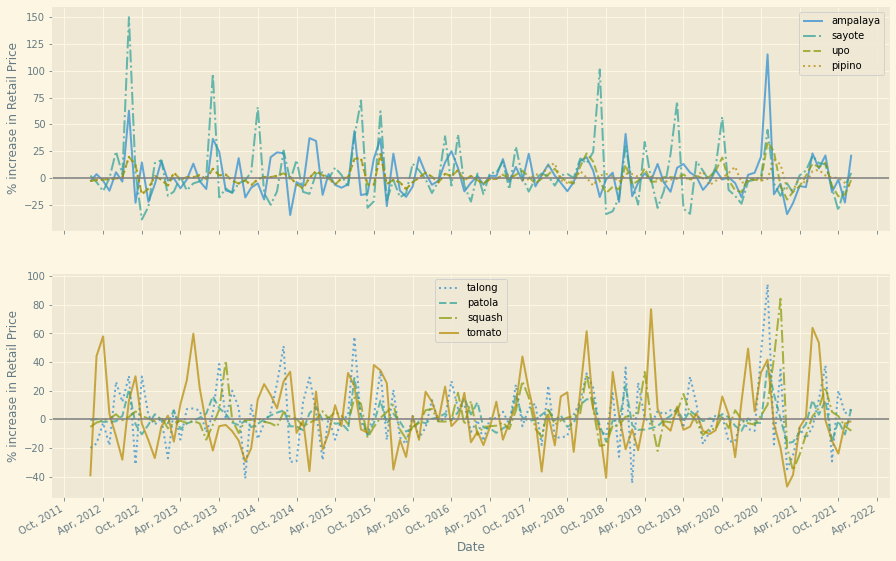

In [ ]:
##%increase
plt.style.use("Solarize_Light2")  ##theme

fig, ax = plt.subplots(2, sharex =True, figsize=(15,10))


ax[0].plot(percents1.index, percents1['percentage_ampalaya'],linestyle= "-", alpha= 0.7)
ax[0].plot(percents1.index, percents1['percentage_sayote'],linestyle= "-.", alpha= 0.7)
ax[0].plot(percents1.index, percents1['percentage_upo'],linestyle="--", alpha= 0.7)
ax[0].plot(percents1.index, percents1['percentage_pipino'],linestyle= ":", alpha= 0.7)

ax[1].plot(percents2.index, percents2['percentage_talong'],linestyle= ":", alpha= 0.7)
ax[1].plot(percents2.index, percents2['percentage_patola'],linestyle="--", alpha= 0.7)
ax[1].plot(percents2.index, percents2['percentage_squash'],linestyle= "-.", alpha= 0.7)
ax[1].plot(percents2.index, percents2['percentage_tomato'],linestyle= "-", alpha= 0.7)

ax[1].axhline(y=0, color= "grey", alpha= 0.8)
ax[1].xaxis.set_major_locator(month_locator) # Locator for major axis only.
ax[1].xaxis.set_major_formatter(year_month_formatter)  # formatter for major axis only


ax[1].set_xlabel("Date")
ax[0].set_ylabel("% increase in Retail Price")
ax[1].set_ylabel("% increase in Retail Price")
ax[0].legend(["ampalaya", "sayote","upo","pipino"])
ax[1].legend(["talong","patola","squash","tomato"])


ax[0].axhline(y=0, color= "grey", alpha= 0.8)
fig.autofmt_xdate()

plt.savefig("%increase.png")

The graph above shows that among fruits and vegetables increase in 2012-2021, the sayote and ampalaya shows a greater than 100% price increase in 2012, 2018, and 2020, respectively.

In [ ]:
prcnt.loc["2021"][["sayote_1kg","sayote","diff_sayote","percentage_squash", "div_sayote"]] ##print to investigate

,sayote_1kg,sayote,diff_sayote,percentage_squash,div_sayote
Date,,,,,
2021-01-01,36.94,44.47,-7.53,84.304852,-0.169328
2021-02-01,35.03,36.94,-1.91,-19.762302,-0.051705
2021-03-01,30.07,35.03,-4.96,-35.695924,-0.141593
2021-04-01,30.72,30.07,0.65,-24.804873,0.021616
2021-05-01,32.81,30.72,2.09,-10.911392,0.068034
2021-06-01,39.51,32.81,6.70,2.102870,0.204206
2021-07-01,44.97,39.51,5.46,7.765099,0.138193
2021-08-01,50.58,44.97,5.61,22.314050,0.124750
2021-09-01,45.88,50.58,-4.70,5.215372,-0.092922


In [ ]:
prcnt["2012"]["percentage_tomato"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


2.2575655321361983

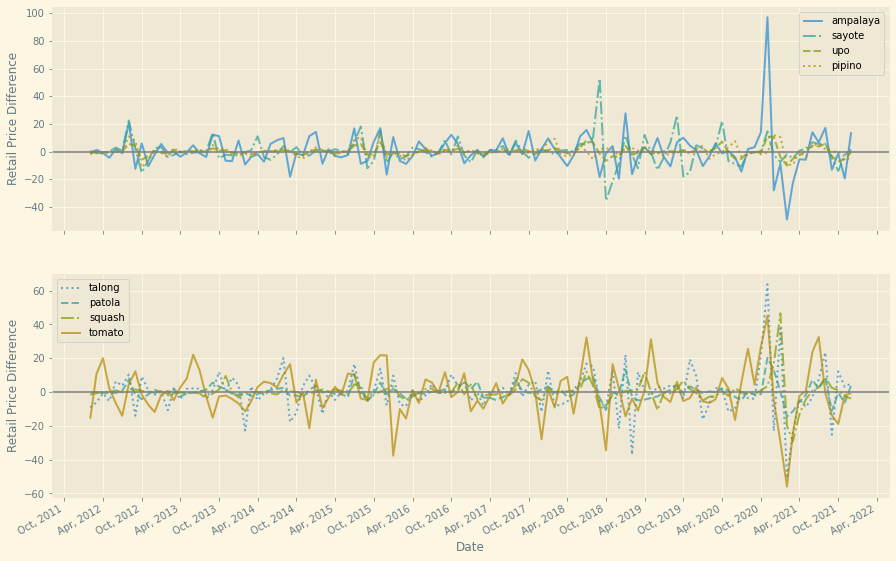

In [ ]:
##Difference
plt.style.use("Solarize_Light2")  ##theme

fig, ax = plt.subplots(2, sharex =True, figsize=(15,10))


ax[0].plot(prcnt.index, prcnt['diff_ampalaya'],linestyle= "-", alpha= 0.7)
ax[0].plot(prcnt.index, prcnt['diff_sayote'],linestyle= "-.", alpha= 0.7)
ax[0].plot(prcnt.index, prcnt['diff_upo'],linestyle="--", alpha= 0.7)
ax[0].plot(prcnt.index, prcnt['diff_pipino'],linestyle= ":", alpha= 0.7)

ax[1].plot(prcnt.index, prcnt['diff_talong'],linestyle= ":", alpha= 0.7)
ax[1].plot(prcnt.index, prcnt['diff_patola'],linestyle="--", alpha= 0.7)
ax[1].plot(prcnt.index, prcnt['diff_squash'],linestyle= "-.", alpha= 0.7)
ax[1].plot(prcnt.index, prcnt['diff_tomato'],linestyle= "-", alpha= 0.7)

ax[1].axhline(y=0, color= "grey", alpha= 0.8)
ax[1].xaxis.set_major_locator(month_locator) # Locator for major axis only.
ax[1].xaxis.set_major_formatter(year_month_formatter)  # formatter for major axis only


ax[1].set_xlabel("Date")
ax[0].set_ylabel("Retail Price Difference")
ax[1].set_ylabel("Retail Price Difference")
ax[0].legend(["ampalaya", "sayote","upo","pipino"])
ax[1].legend(["talong","patola","squash","tomato"])


ax[0].axhline(y=0, color= "grey", alpha= 0.8)
fig.autofmt_xdate()

plt.savefig("diference.png")

In [ ]:
##Decomposition

ts_decompose_add = sm(x=prcnt['tomato_1kg'], ##change variables here
                                          model='additive') # 
estimated_trend_add = ts_decompose_add.trend
estimated_seasonal_add = ts_decompose_add.seasonal
estimated_residual_add = ts_decompose_add.resid

Text(0.5, 0, 'Year')

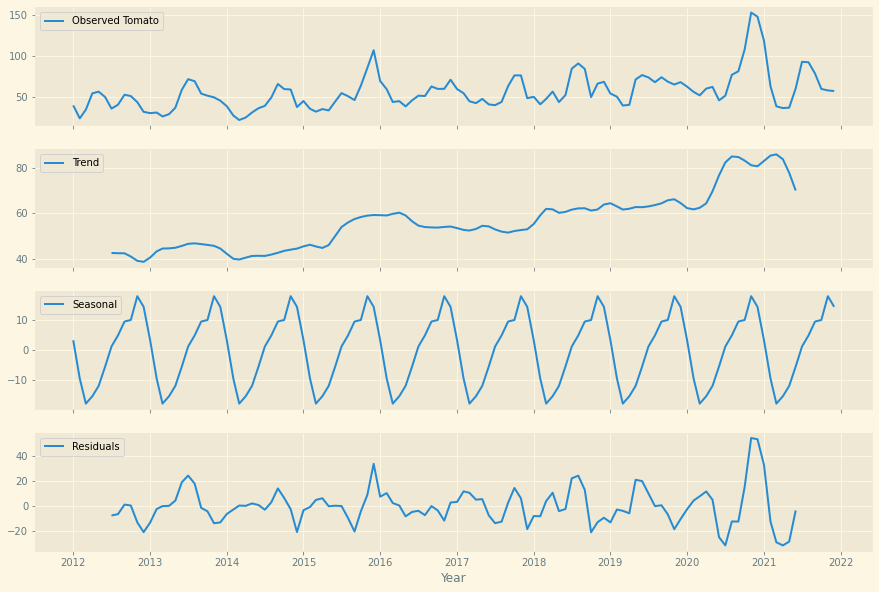

In [ ]:
plt.style.use("Solarize_Light2")  ##theme

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(prcnt['tomato_1kg'], label='Observed Tomato')  ##change variables here
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend_add, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal_add, label='Seasonal')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual_add, label='Residuals')
axes[3].legend(loc='upper left');

axes[3].set_xlabel("Year")

#plt.savefig("tomato.png")